In [50]:
import cv2 as cv
import matplotlib.pyplot as plt

In [51]:
img = cv.imread("/home/shahin/Desktop/M1/Sajjad project/Assignment-28/image/sudoku3.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

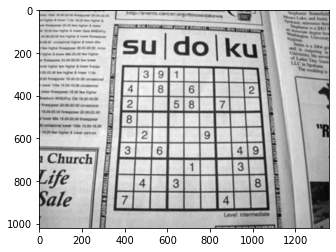

In [52]:
imgBlur = cv.GaussianBlur(imgGray, (7,7), 3)
plt.imshow(imgBlur, cmap="gray")

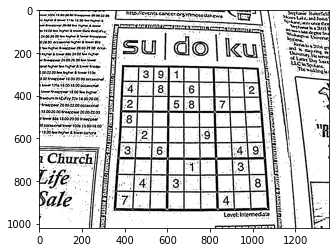

In [53]:
thresh = cv.adaptiveThreshold(imgBlur, 255, adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv.THRESH_BINARY, blockSize=11, C=2)
plt.imshow(thresh, cmap="gray")
#thresh = cv.adaptiveThreshold(imgBlur, 255, adaptiveMethod=cv.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType=cv.THRESH_BINARY_INV, blockSize=11, C=2)


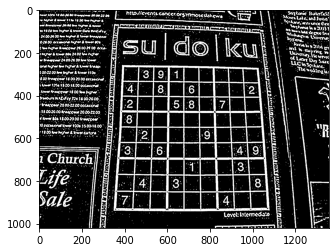

In [54]:
thresh = cv.bitwise_not(thresh)
plt.imshow(thresh, cmap="gray")

In [55]:
contours = cv.findContours(thresh, mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_SIMPLE)
contours = contours[0]
contours

[array([[[ 965, 1019]],
 
        [[ 969, 1019]]], dtype=int32),
 array([[[ 374, 1018]],
 
        [[ 374, 1019]]], dtype=int32),
 array([[[1150, 1017]],
 
        [[1151, 1018]],
 
        [[1150, 1019]],
 
        [[1152, 1019]],
 
        [[1151, 1018]],
 
        [[1152, 1017]],
 
        [[1151, 1018]]], dtype=int32),
 array([[[1025, 1017]],
 
        [[1024, 1018]],
 
        [[1025, 1019]],
 
        [[1032, 1019]],
 
        [[1032, 1018]],
 
        [[1031, 1017]]], dtype=int32),
 array([[[ 993, 1017]],
 
        [[ 992, 1018]],
 
        [[ 992, 1019]],
 
        [[ 999, 1019]],
 
        [[ 999, 1018]],
 
        [[ 997, 1018]],
 
        [[ 996, 1017]]], dtype=int32),
 array([[[ 294, 1017]],
 
        [[ 293, 1018]],
 
        [[ 293, 1019]],
 
        [[ 297, 1019]],
 
        [[ 297, 1018]],
 
        [[ 296, 1018]],
 
        [[ 295, 1017]]], dtype=int32),
 array([[[ 270, 1017]]], dtype=int32),
 array([[[1085, 1016]],
 
        [[1083, 1018]],
 
        [[1083, 1019]],
 

In [56]:
contours = sorted(contours, key=cv.contourArea, reverse=True)

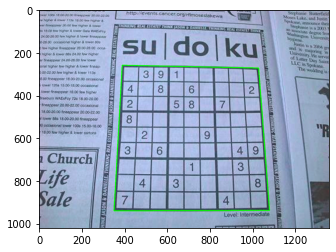

In [70]:
sudokuContour = None
for contour in contours:

    epsilon = 0.01 * cv.arcLength(contour, True)
    approx = cv.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4 :
        sudokuContour = approx
        break
        
if sudokuContour is None:
    print("can't find sudoku table..." )
else:
    result = cv.drawContours(img, [sudokuContour], -1, (0,255,0), 4)
    plt.imshow(result)